In [1]:
library(ggplot2)

In [2]:
df <- read.csv('Economist_Assignment_Data.csv')

In [3]:
head(df)

,X,Country,HDI.Rank,HDI,CPI,Region
,<int>,<chr>,<int>,<dbl>,<dbl>,<chr>
1,1,Afghanistan,172,0.398,1.5,Asia Pacific
2,2,Albania,70,0.739,3.1,East EU Cemt Asia
3,3,Algeria,96,0.698,2.9,MENA
4,4,Angola,148,0.486,2.0,SSA
5,5,Argentina,45,0.797,3.0,Americas
6,6,Armenia,86,0.716,2.6,East EU Cemt Asia


In [4]:
df <- subset(df,select = -c(1))


In [ ]:
head(df)

,Country,HDI.Rank,HDI,CPI,Region
,<chr>,<int>,<dbl>,<dbl>,<chr>
1,Afghanistan,172,0.398,1.5,Asia Pacific
2,Albania,70,0.739,3.1,East EU Cemt Asia
3,Algeria,96,0.698,2.9,MENA
4,Angola,148,0.486,2.0,SSA
5,Argentina,45,0.797,3.0,Americas
6,Armenia,86,0.716,2.6,East EU Cemt Asia


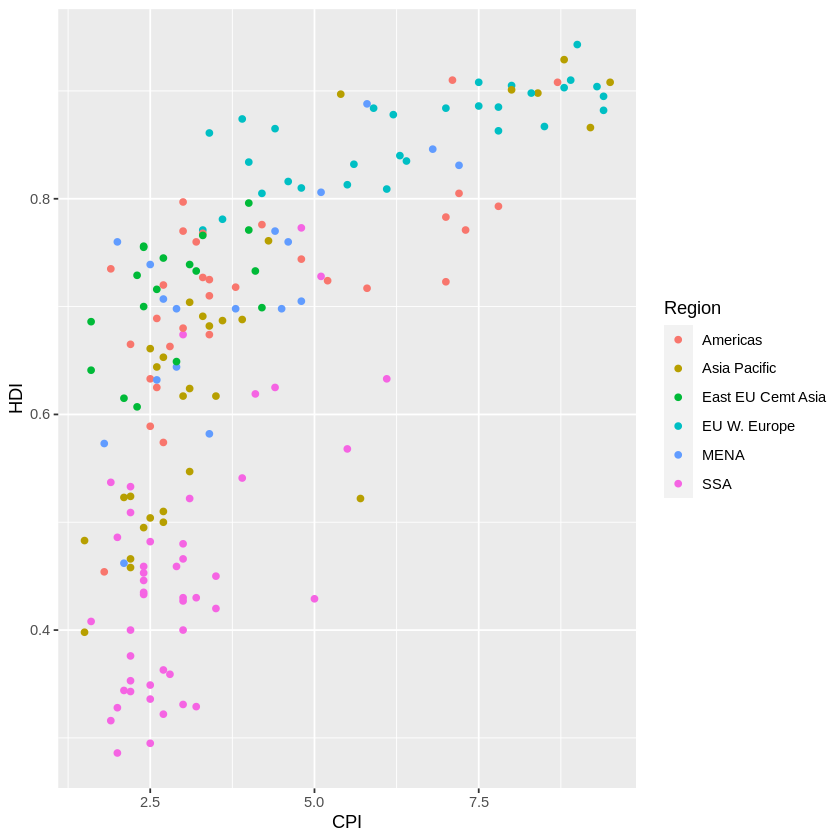

In [8]:
#Use ggplot() + geom_point() to create a scatter plot object called pl. You will need to specify x=CPI and y=HDI and color=Region as aesthetics


pl <- ggplot(df, aes(x = CPI, y=HDI))
pl + geom_point(aes(color = Region))

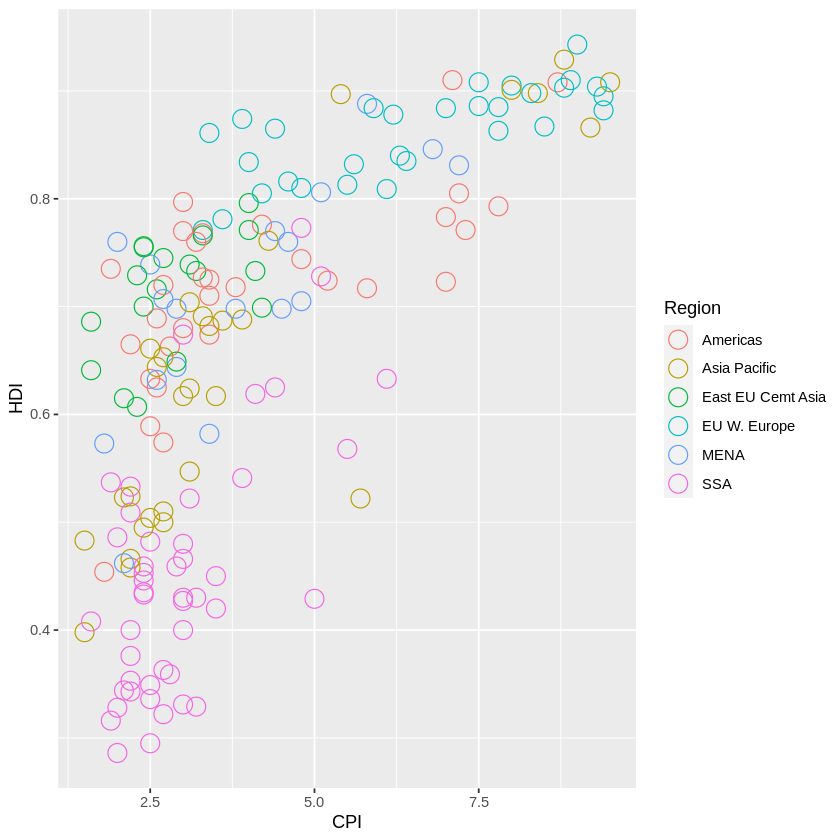

In [9]:
#Change the points to be larger empty circles. 
#(You'll have to go back and add arguments to geom_point() and reassign it to pl.) 
#You'll need to figure out what shape= and size=

pl <- ggplot(df, aes(x = CPI, y=HDI))
pl + geom_point(aes(color = Region),size=5,shape=1)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



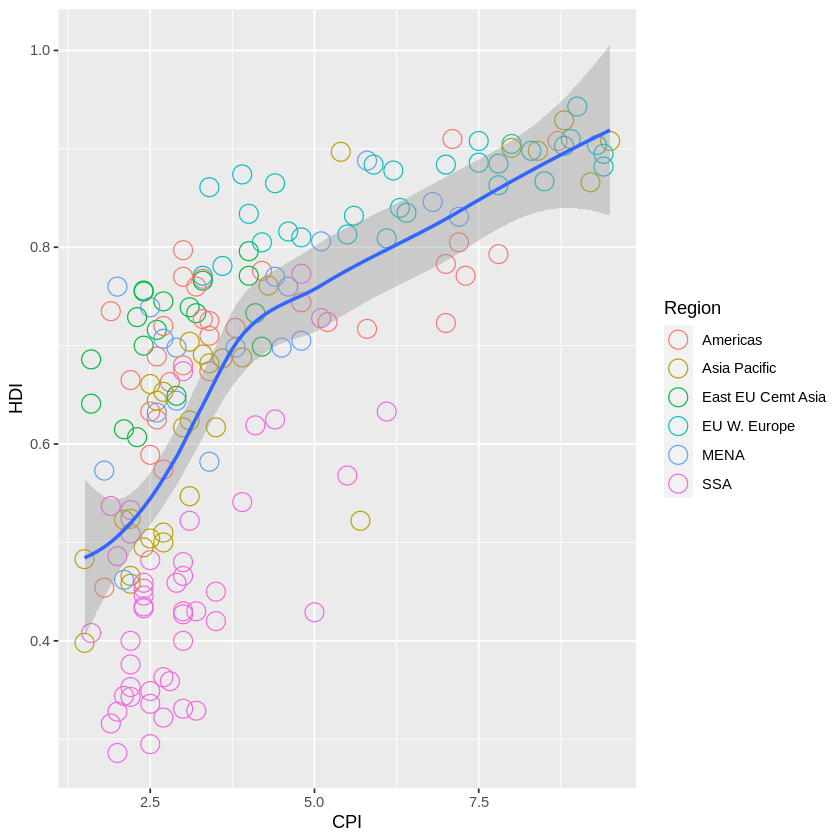

In [10]:
#Add geom_smooth(aes(group=1)) to add a trend line

pl <- ggplot(df, aes(x = CPI, y=HDI))
pl + geom_point(aes(color = Region),size=5,shape=1) + geom_smooth(aes(group=1)) 

We want to further edit this trend line. Add the following arguments to geom_smooth (outside of aes):

method = 'lm'
formula = y ~ log(x)
se = FALSE
color = 'red'
For more info on these arguments, check out the documentation under the Arguments list for details.

Assign all of this to pl2



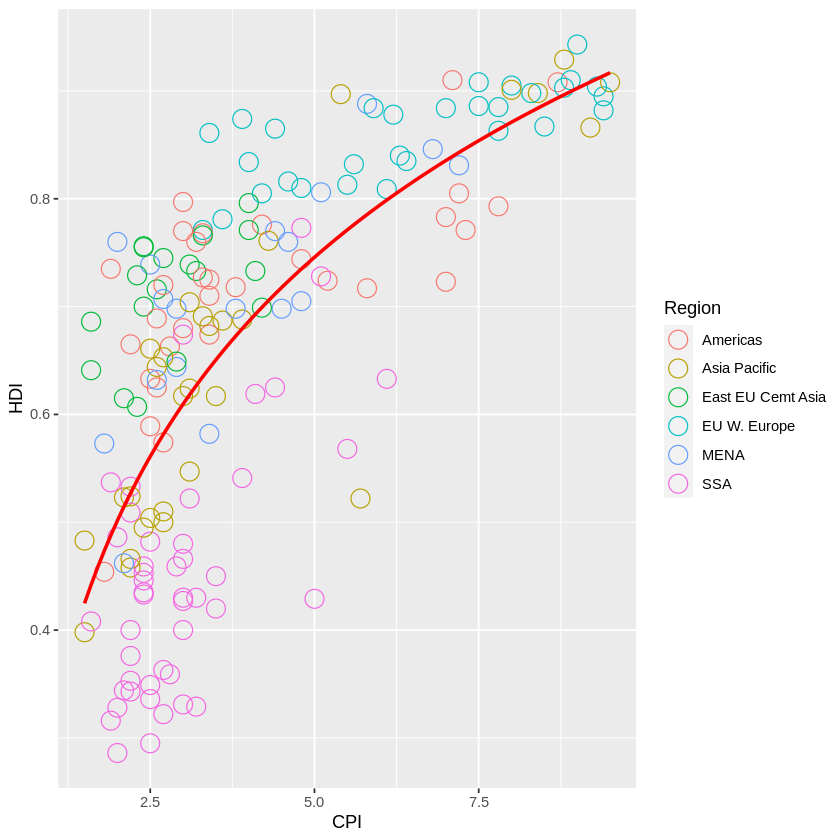

In [11]:
pl <- ggplot(df, aes(x = CPI, y=HDI))
pl + geom_point(aes(color = Region),size=5,shape=1) + geom_smooth(aes(group=1), method = 'lm', formula = y ~ log(x), se = FALSE, color = 'red') 

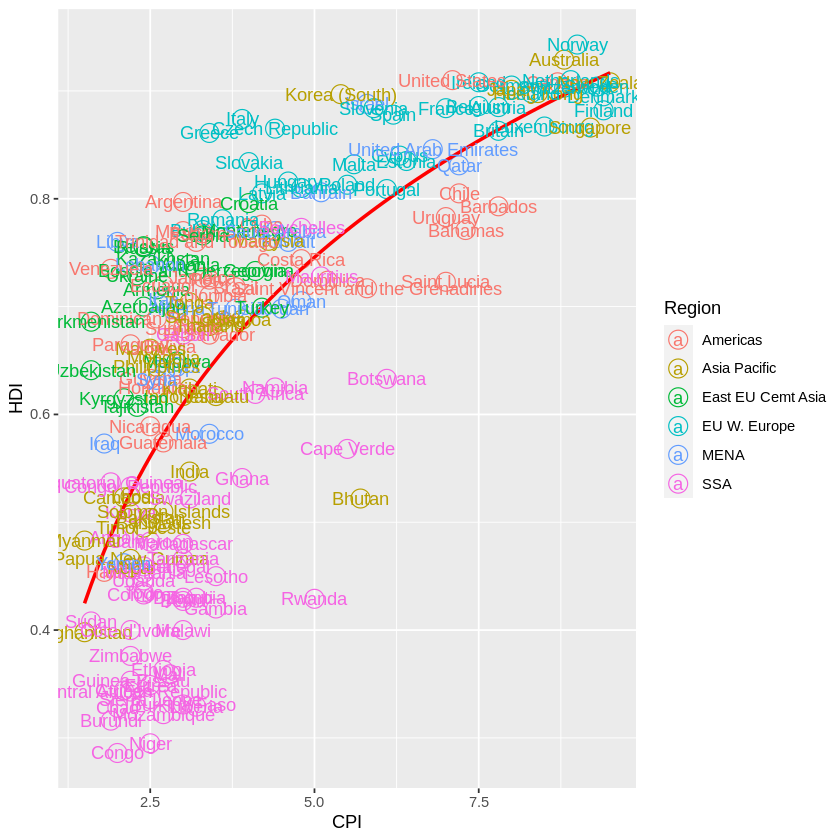

In [12]:
#It's really starting to look similar! But we still need to add labels, 
#we can use geom_text! Add geom_text(aes(label=Country)) to pl2 and see what happens. 
#(Hint: It should be way too many labels)
pl <- ggplot(df, aes(x = CPI, y=HDI))
pl + geom_point(aes(color = Region),size=5,shape=1) + geom_smooth(aes(group=1), method = 'lm', formula = y ~ log(x), se = FALSE, color = 'red') +
 geom_text(aes(label = Country,color= Region))

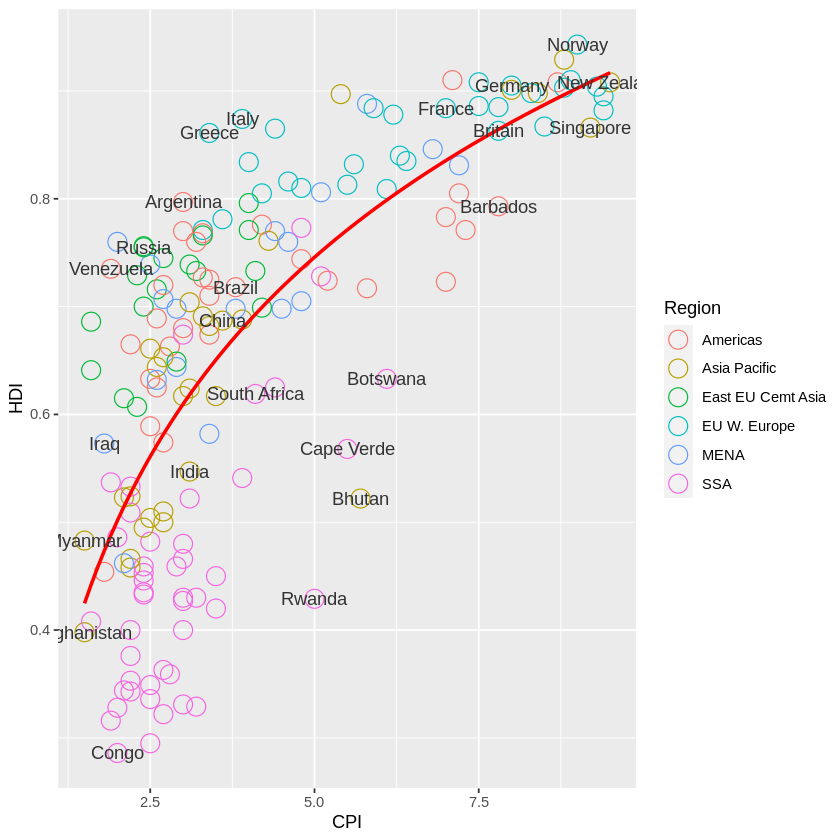

In [13]:
#Labeling a subset is actually pretty tricky! 
#So we're just going to give you the answer since it would require manually 
#selecting the subset of countries we want to label!

pointsToLabel <- c("Russia", "Venezuela", "Iraq", "Myanmar", "Sudan",
                   "Afghanistan", "Congo", "Greece", "Argentina", "Brazil",
                   "India", "Italy", "China", "South Africa", "Spane",
                   "Botswana", "Cape Verde", "Bhutan", "Rwanda", "France",
                   "United States", "Germany", "Britain", "Barbados", "Norway", "Japan",
                   "New Zealand", "Singapore")

pl + geom_point(aes(color = Region),size=5,shape=1) + geom_smooth(aes(group=1), method = 'lm', formula = y ~ log(x), se = FALSE, color = 'red') +
geom_text(aes(label = Country), color = "gray20", data = subset(df, Country %in% pointsToLabel),check_overlap = TRUE)

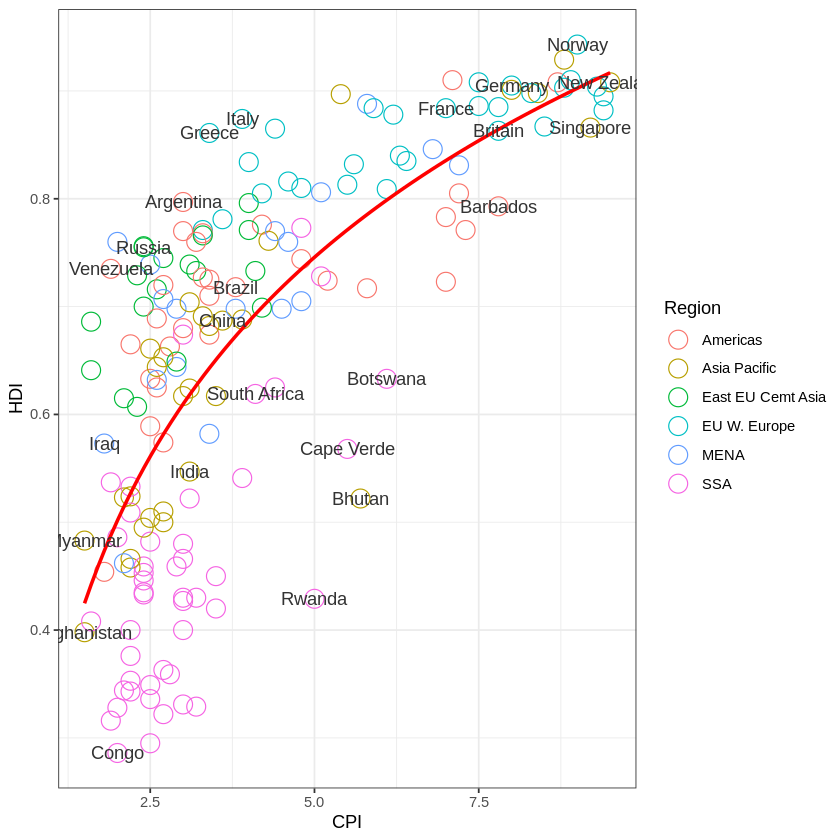

In [14]:
#Add theme_bw() to your plot and save this to pl4

pl + geom_point(aes(color = Region),size=5,shape=1) + geom_smooth(aes(group=1), method = 'lm', formula = y ~ log(x), se = FALSE, color = 'red') +
geom_text(aes(label = Country), color = "gray20", data = subset(df, Country %in% pointsToLabel),check_overlap = TRUE) +
theme_bw()

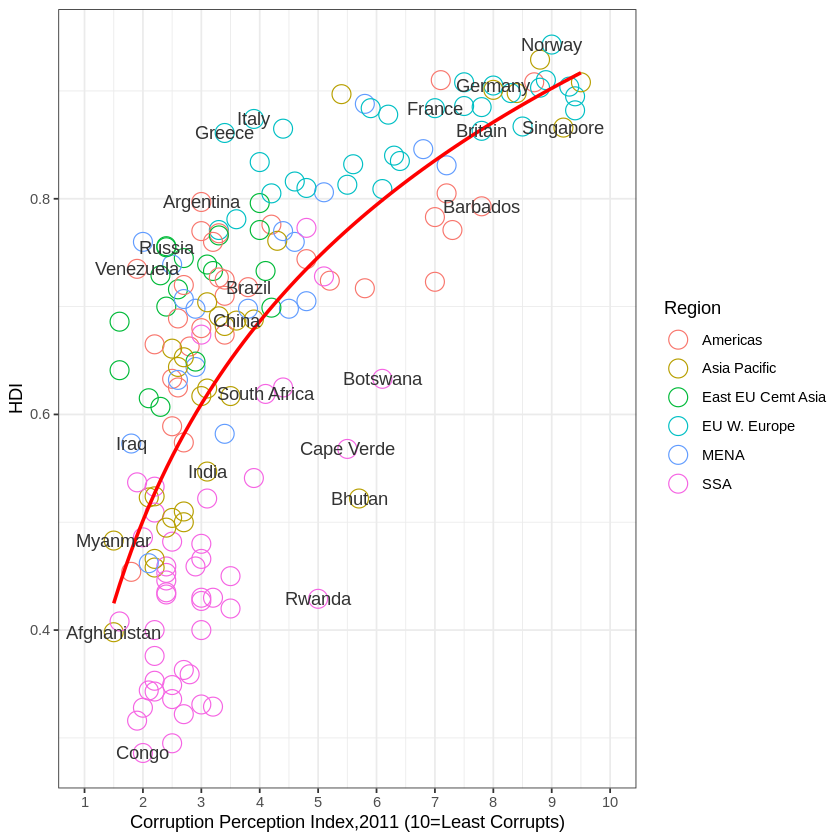

In [15]:
#Add scale_x_continuous() and set the following arguments:
#name = Same x axis as the Economist Plot
#limits = Pass a vector of appropriate x limits
#breaks = 1:10
pl + geom_point(aes(color = Region),size=5,shape=1) + geom_smooth(aes(group=1), method = 'lm', formula = y ~ log(x), se = FALSE, color = 'red') +
geom_text(aes(label = Country), color = "gray20", data = subset(df, Country %in% pointsToLabel),check_overlap = TRUE) +
theme_bw()+scale_x_continuous(name = 'Corruption Perception Index,2011 (10=Least Corrupts)', limits = c(1,10),breaks = 1:10) 

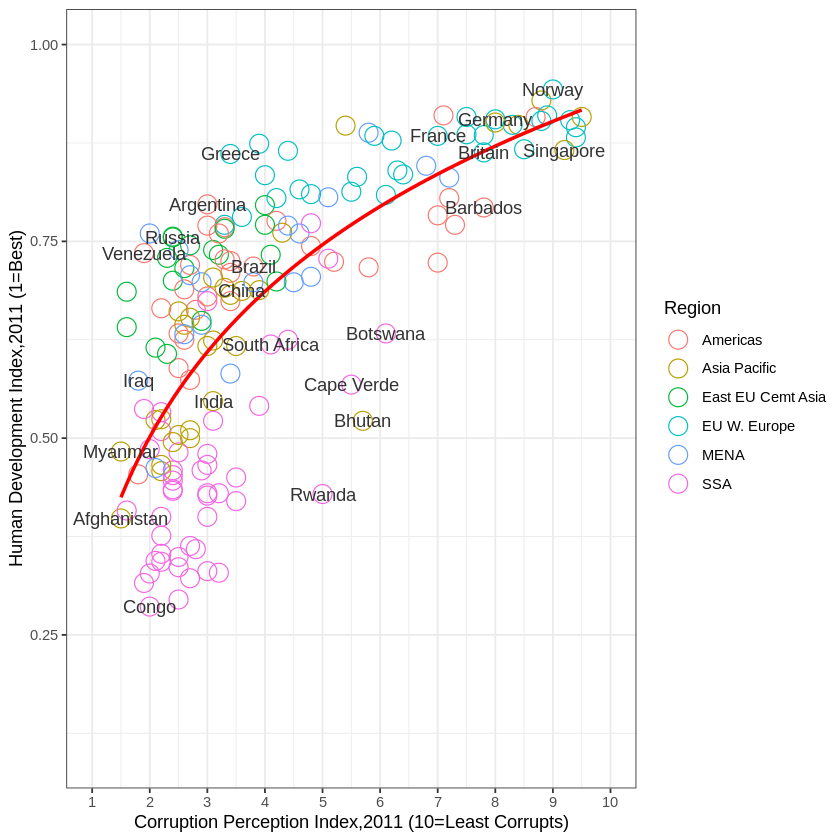

In [24]:
pl + geom_point(aes(color = Region),size=5,shape=1) + geom_smooth(aes(group=1), method = 'lm', formula = y ~ log(x), se = FALSE, color = 'red') +
geom_text(aes(label = Country), color = "gray20", data = subset(df, Country %in% pointsToLabel),check_overlap = TRUE) +
theme_bw()+scale_x_continuous(name = 'Corruption Perception Index,2011 (10=Least Corrupts)', limits = c(1,10),breaks = 1:10) +
scale_y_continuous(name = 'Human Development Index,2011 (1=Best)', limits = c(0.1,1)) 

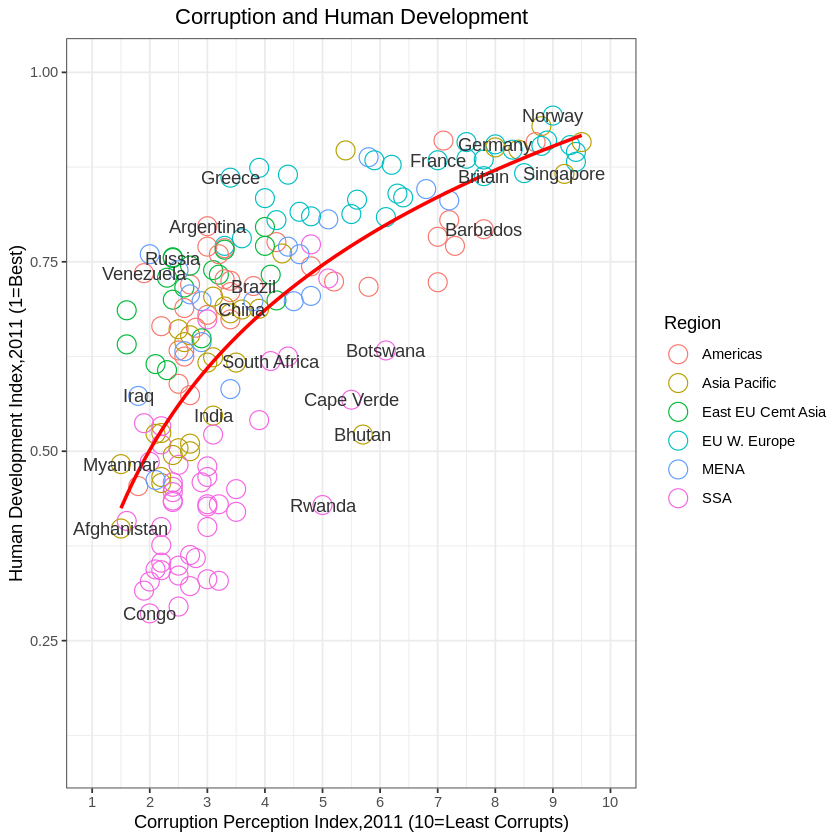

In [29]:
#Finally use ggtitle() to add a string as a title.

pl + geom_point(aes(color = Region),size=5,shape=1) + geom_smooth(aes(group=1), method = 'lm', formula = y ~ log(x), se = FALSE, color = 'red') +
geom_text(aes(label = Country), color = "gray20", data = subset(df, Country %in% pointsToLabel),check_overlap = TRUE) +
theme_bw()+scale_x_continuous(name = 'Corruption Perception Index,2011 (10=Least Corrupts)', limits = c(1,10),breaks = 1:10) +
scale_y_continuous(name = 'Human Development Index,2011 (1=Best)', limits = c(0.1,1)) +ggtitle("Corruption and Human Development")+  
theme(plot.title = element_text(hjust = 0.5))